In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fakenewsnet/PolitiFactNews.txt
/kaggle/input/fakenewsnet/PolitiFactUser.txt
/kaggle/input/fakenewsnet/BuzzFeedNews.txt
/kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv
/kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv
/kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv
/kaggle/input/fakenewsnet/BuzzFeedUserFeature.mat
/kaggle/input/fakenewsnet/BuzzFeedNewsUser.txt
/kaggle/input/fakenewsnet/BuzzFeedUser.txt
/kaggle/input/fakenewsnet/PolitiFactUserUser.txt
/kaggle/input/fakenewsnet/BuzzFeedUserUser.txt
/kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.csv
/kaggle/input/fakenewsnet/PolitiFactUserFeature.mat
/kaggle/input/fakenewsnet/PolitiFactNewsUser.txt


In [2]:
df = pd.read_csv("/kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv")
df.head()

,id,title,text,url,top_img,authors,source,publish_date,movies,images,canonical_link,meta_data
0,Real_1-Webpage,Trump Just Insulted Millions Who Lost Everythi...,16.8k SHARES SHARE THIS STORY\n\nHillary Clint...,http://occupydemocrats.com/2016/09/27/trump-ju...,http://occupydemocrats.com/wp-content/uploads/...,"Brett Bose,Grant Stern,Steve Bernstein,Natalie...",http://occupydemocrats.com,{'$date': 1474934400000},NaN,http://occupydemocrats.com/wp-content/uploads/...,http://occupydemocrats.com/2016/09/27/trump-ju...,"{""generator"": ""Powered by Visual Composer - dr..."
1,Real_10-Webpage,Famous dog killed in spot she waited a year fo...,Famous dog killed in spot she waited a year fo...,http://rightwingnews.com/top-news/famous-dog-k...,http://rightwingnews.com/wp-content/uploads/20...,NaN,http://rightwingnews.com,{'$date': 1474948336000},NaN,http://rightwingnews.com/wp-content/uploads/20...,http://rightwingnews.com/top-news/famous-dog-k...,"{""googlebot"": ""noimageindex"", ""og"": {""site_nam..."
2,Real_100-Webpage,House oversight panel votes Clinton IT chief i...,Story highlights The House Oversight panel vot...,http://cnn.it/2deaH2d,http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...,"Tom Lobianco,Deirdre Walsh",http://cnn.it,NaN,NaN,http://i2.cdn.cnn.com/cnnnext/dam/assets/17050...,http://www.cnn.com/2016/09/22/politics/bryan-p...,"{""description"": ""Members of the House Oversigh..."
3,Real_101-Webpage,America Just Tragically Lost A Country Music I...,We are absolutely heartbroken to hear about th...,http://newsbake.com/entertainment-news/music-e...,http://newsbake.com/wp-content/uploads/2016/05...,Nancy Wells,http://newsbake.com,{'$date': 1474898600000},https://www.youtube.com/embed/8ozTJcu-_BU,http://0.gravatar.com/avatar/0d702c6042933cd78...,http://newsbake.com/entertainment-news/music-e...,"{""shareaholic"": {""site_name"": ""NewsBake"", ""lan..."
4,Real_102-Webpage,Monuments to the Battle for the New South,"Nine years ago, a driver lost control of his p...",http://politi.co/2dd9U1x,http://static.politico.com/25/ed/85332de14c45b...,"Jack Shafer,Lisa Rab",http://politi.co,{'$date': 1473941820000},NaN,http://static.politico.com/25/ed/85332de14c45b...,http://www.politico.com/magazine/story/2016/09...,"{""description"": ""Virginia, increasingly divers..."


libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

warnings.filterwarnings('ignore')
plt.style.use('ggplot')


data loading

In [4]:
# Load the datasets
def load_data():
    """Load all the FakeNewsNet dataset files"""
    
    # Load BuzzFeed data
    try:
        buzzfeed_fake = pd.read_csv('/kaggle/input/fakenewsnet/BuzzFeed_fake_news_content.csv')
        buzzfeed_real = pd.read_csv('/kaggle/input/fakenewsnet/BuzzFeed_real_news_content.csv')
        print(f"BuzzFeed Fake News: {len(buzzfeed_fake)} articles")
        print(f"BuzzFeed Real News: {len(buzzfeed_real)} articles")
    except Exception as e:
        print(f"Error loading BuzzFeed data: {e}")
        
    # Load PolitiFact data
    try:
        politifact_fake = pd.read_csv('/kaggle/input/fakenewsnet/PolitiFact_fake_news_content.csv')
        politifact_real = pd.read_csv('/kaggle/input/fakenewsnet/PolitiFact_real_news_content.csv')
        print(f"PolitiFact Fake News: {len(politifact_fake)} articles")
        print(f"PolitiFact Real News: {len(politifact_real)} articles")
    except Exception as e:
        print(f"Error loading PolitiFact data: {e}")
    
    return buzzfeed_fake, buzzfeed_real, politifact_fake, politifact_real

# Load all datasets
buzzfeed_fake, buzzfeed_real, politifact_fake, politifact_real = load_data()


BuzzFeed Fake News: 91 articles
BuzzFeed Real News: 91 articles
PolitiFact Fake News: 120 articles
PolitiFact Real News: 120 articles


data preprocessing and data cleaning

In [5]:
def preprocess_data(fake_df, real_df, source_name):
    """Preprocess and combine fake and real news data"""
    
    # Add labels
    fake_df = fake_df.copy()
    real_df = real_df.copy()
    
    fake_df['label'] = 0  # Fake news
    real_df['label'] = 1  # Real news
    fake_df['source_type'] = source_name
    real_df['source_type'] = source_name
    
    # Combine datasets
    combined_df = pd.concat([fake_df, real_df], ignore_index=True)
    
    # Basic cleaning
    if 'title' in combined_df.columns:
        combined_df['title'] = combined_df['title'].fillna('')
    if 'text' in combined_df.columns:
        combined_df['text'] = combined_df['text'].fillna('')
    
    print(f"\n{source_name} Dataset Overview:")
    print(f"Total articles: {len(combined_df)}")
    print(f"Fake news: {len(fake_df)} ({len(fake_df)/len(combined_df)*100:.1f}%)")
    print(f"Real news: {len(real_df)} ({len(real_df)/len(combined_df)*100:.1f}%)")
    
    return combined_df

# Preprocess both datasets
buzzfeed_combined = preprocess_data(buzzfeed_fake, buzzfeed_real, 'BuzzFeed')
politifact_combined = preprocess_data(politifact_fake, politifact_real, 'PolitiFact')

# Combine all data
all_data = pd.concat([buzzfeed_combined, politifact_combined], ignore_index=True)
print(f"\nCombined Dataset: {len(all_data)} total articles")



BuzzFeed Dataset Overview:
Total articles: 182
Fake news: 91 (50.0%)
Real news: 91 (50.0%)

PolitiFact Dataset Overview:
Total articles: 240
Fake news: 120 (50.0%)
Real news: 120 (50.0%)

Combined Dataset: 422 total articles


EDA


In [6]:
# Basic statistics
def dataset_overview():
    """Provide comprehensive dataset overview"""
    
    print("=== FAKENEWSNET DATASET ANALYSIS ===\n")
    
    # Overall statistics
    print("📊 Dataset Overview:")
    print(f"Total articles: {len(all_data):,}")
    print(f"Sources: {all_data['source_type'].nunique()}")
    print(f"Fake news: {sum(all_data['label'] == 0):,} ({sum(all_data['label'] == 0)/len(all_data)*100:.1f}%)")
    print(f"Real news: {sum(all_data['label'] == 1):,} ({sum(all_data['label'] == 1)/len(all_data)*100:.1f}%)")
    
    # Missing values analysis
    print(f"\n📋 Data Quality:")
    missing_data = all_data.isnull().sum()
    for col, missing in missing_data.items():
        if missing > 0:
            print(f"{col}: {missing:,} missing ({missing/len(all_data)*100:.1f}%)")
    
    print(f"\nColumns available: {list(all_data.columns)}")

dataset_overview()


=== FAKENEWSNET DATASET ANALYSIS ===

📊 Dataset Overview:
Total articles: 422
Sources: 2
Fake news: 211 (50.0%)
Real news: 211 (50.0%)

📋 Data Quality:
url: 12 missing (2.8%)
top_img: 14 missing (3.3%)
authors: 67 missing (15.9%)
source: 12 missing (2.8%)
publish_date: 127 missing (30.1%)
movies: 383 missing (90.8%)
images: 14 missing (3.3%)
canonical_link: 22 missing (5.2%)

Columns available: ['id', 'title', 'text', 'url', 'top_img', 'authors', 'source', 'publish_date', 'movies', 'images', 'canonical_link', 'meta_data', 'label', 'source_type']


graphs


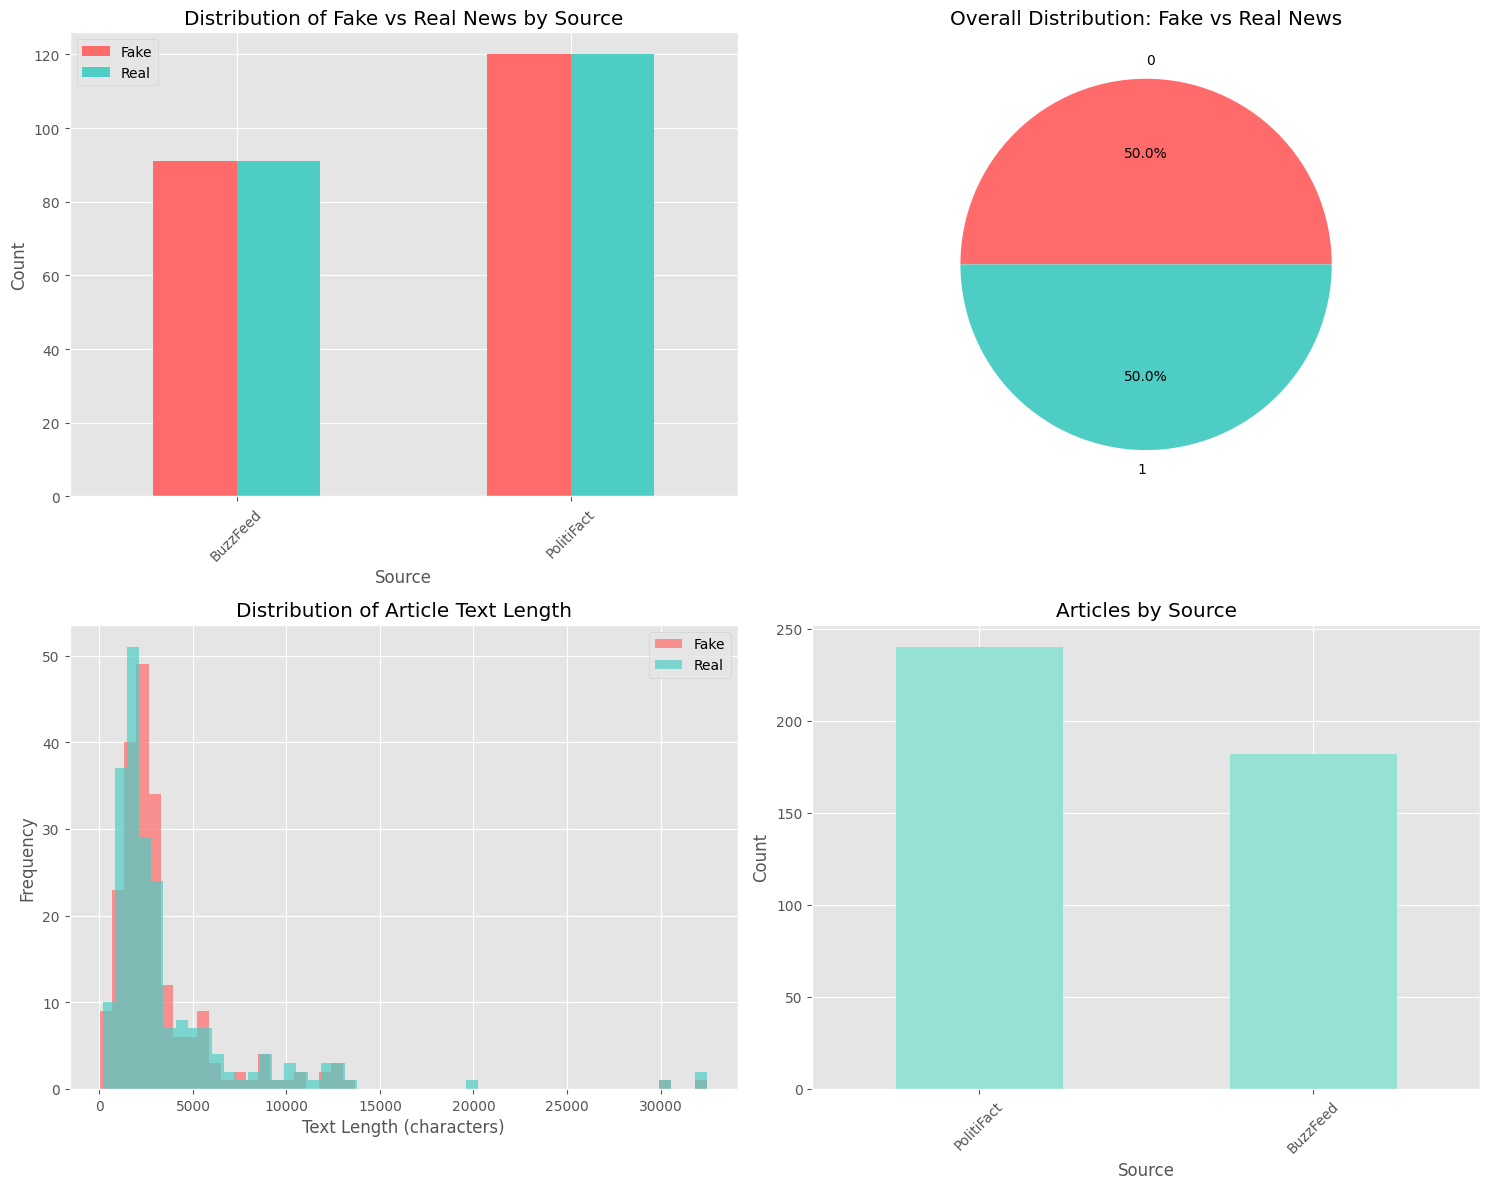

In [7]:
# Create visualizations
def create_visualizations():
    """Create comprehensive visualizations"""
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Distribution by source and label
    label_source = pd.crosstab(all_data['source_type'], all_data['label'])
    label_source.plot(kind='bar', ax=axes[0,0], color=['#FF6B6B', '#4ECDC4'])
    axes[0,0].set_title('Distribution of Fake vs Real News by Source')
    axes[0,0].set_xlabel('Source')
    axes[0,0].set_ylabel('Count')
    axes[0,0].legend(['Fake', 'Real'])
    axes[0,0].tick_params(axis='x', rotation=45)
    
    # 2. Overall distribution
    all_data['label'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', 
                                         colors=['#FF6B6B', '#4ECDC4'])
    axes[0,1].set_title('Overall Distribution: Fake vs Real News')
    axes[0,1].set_ylabel('')
    
    # 3. Text length analysis (if text column exists)
    if 'text' in all_data.columns:
        all_data['text_length'] = all_data['text'].str.len()
        fake_lengths = all_data[all_data['label'] == 0]['text_length']
        real_lengths = all_data[all_data['label'] == 1]['text_length']
        
        axes[1,0].hist(fake_lengths.dropna(), alpha=0.7, label='Fake', bins=50, color='#FF6B6B')
        axes[1,0].hist(real_lengths.dropna(), alpha=0.7, label='Real', bins=50, color='#4ECDC4')
        axes[1,0].set_title('Distribution of Article Text Length')
        axes[1,0].set_xlabel('Text Length (characters)')
        axes[1,0].set_ylabel('Frequency')
        axes[1,0].legend()
    
    # 4. Source comparison
    source_counts = all_data['source_type'].value_counts()
    source_counts.plot(kind='bar', ax=axes[1,1], color='#95E1D3')
    axes[1,1].set_title('Articles by Source')
    axes[1,1].set_xlabel('Source')
    axes[1,1].set_ylabel('Count')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

create_visualizations()


text analysis

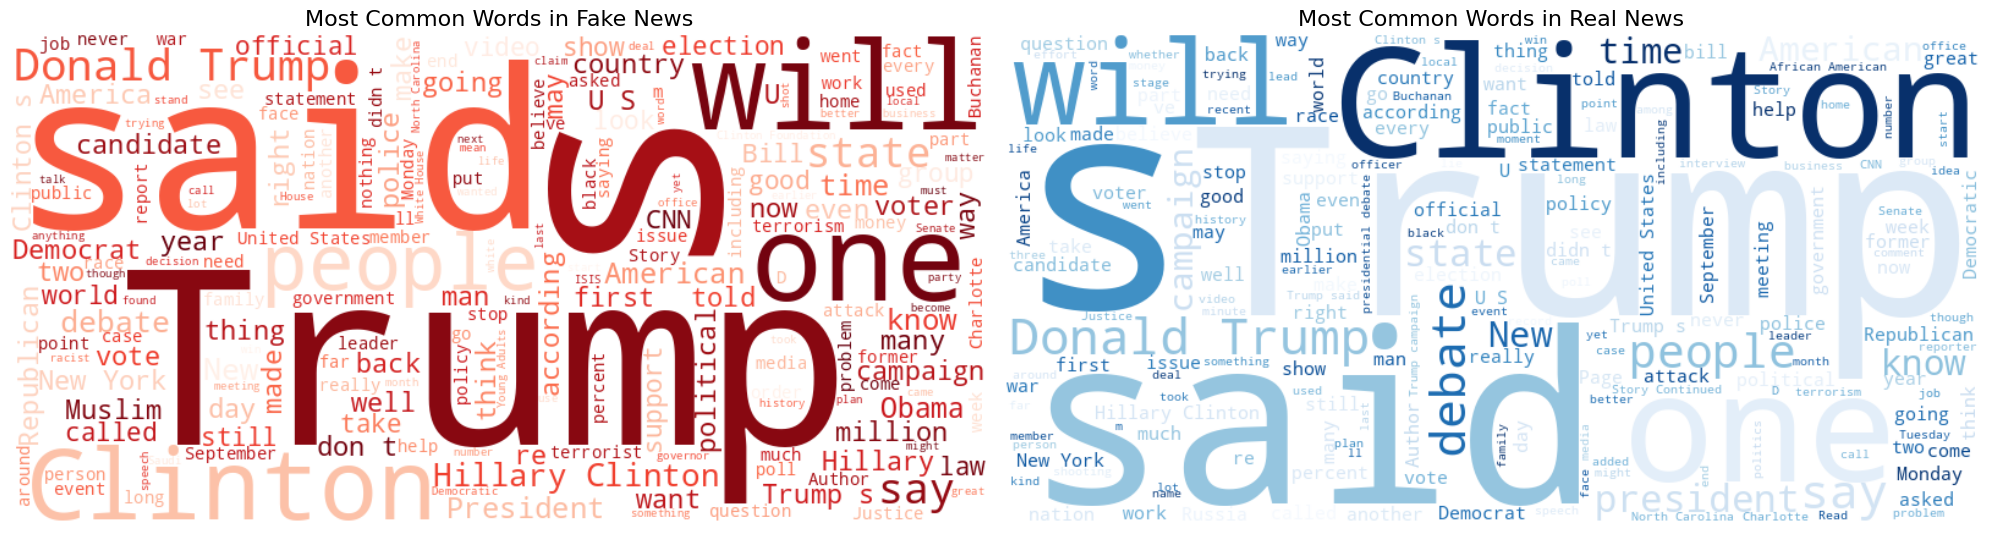

In [8]:
def text_analysis():
    """Perform text analysis and create word clouds"""
    
    # Combine text fields if available
    text_columns = ['title', 'text', 'content']  # Adjust based on your dataset columns
    available_text_cols = [col for col in text_columns if col in all_data.columns]
    
    if available_text_cols:
        # Create combined text
        all_data['combined_text'] = all_data[available_text_cols].fillna('').agg(' '.join, axis=1)
        
        # Separate fake and real news text
        fake_text = ' '.join(all_data[all_data['label'] == 0]['combined_text'].dropna())
        real_text = ' '.join(all_data[all_data['label'] == 1]['combined_text'].dropna())
        
        # Create word clouds
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        
        # Fake news word cloud
        if fake_text:
            fake_wordcloud = WordCloud(width=800, height=400, 
                                     background_color='white',
                                     colormap='Reds').generate(fake_text)
            axes[0].imshow(fake_wordcloud, interpolation='bilinear')
            axes[0].set_title('Most Common Words in Fake News', fontsize=16)
            axes[0].axis('off')
        
        # Real news word cloud
        if real_text:
            real_wordcloud = WordCloud(width=800, height=400, 
                                     background_color='white',
                                     colormap='Blues').generate(real_text)
            axes[1].imshow(real_wordcloud, interpolation='bilinear')
            axes[1].set_title('Most Common Words in Real News', fontsize=16)
            axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        return fake_text, real_text
    else:
        print("No text columns found for analysis")
        return None, None

fake_text, real_text = text_analysis()


Machine Learning Model

Building model with 422 samples

🎯 Model Performance:
              precision    recall  f1-score   support

        Fake       0.46      0.40      0.43        48
        Real       0.34      0.41      0.37        37

    accuracy                           0.40        85
   macro avg       0.40      0.40      0.40        85
weighted avg       0.41      0.40      0.40        85



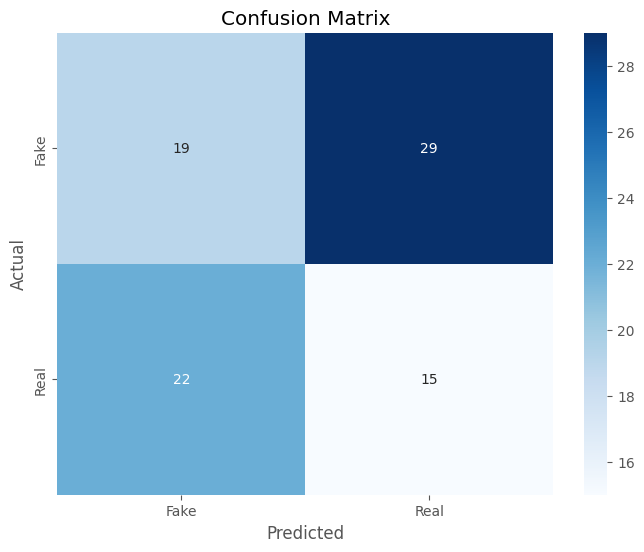

In [9]:
def build_classification_model():
    """Build a simple fake news classification model"""
    
    # Check if we have text data
    text_columns = ['title', 'text', 'content']
    available_text_cols = [col for col in text_columns if col in all_data.columns]
    
    if not available_text_cols:
        print("No text columns available for modeling")
        return
    
    # Prepare data
    all_data['combined_text'] = all_data[available_text_cols].fillna('').agg(' '.join, axis=1)
    
    # Remove empty texts
    model_data = all_data[all_data['combined_text'].str.len() > 0].copy()
    
    if len(model_data) == 0:
        print("No valid text data for modeling")
        return
    
    print(f"Building model with {len(model_data)} samples")
    
    # Split data
    X = model_data['combined_text']
    y = model_data['label']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Vectorize text
    vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train_vec, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_vec)
    
    # Results
    print("\n🎯 Model Performance:")
    print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return model, vectorizer

model, vectorizer = build_classification_model()


some more insights


In [10]:
def advanced_analysis():
    """Perform advanced analysis of the dataset"""
    
    print("=== ADVANCED ANALYSIS ===\n")
    
    # 1. Source-specific analysis
    print("📈 Source-specific Statistics:")
    source_stats = all_data.groupby(['source_type', 'label']).size().unstack(fill_value=0)
    print(source_stats)
    
    # 2. Text length comparison
    if 'text_length' in all_data.columns:
        print(f"\n📏 Text Length Analysis:")
        length_stats = all_data.groupby('label')['text_length'].describe()
        print(length_stats)
    
    # 3. Missing data patterns
    print(f"\n🔍 Data Quality by Label:")
    for label in [0, 1]:
        label_name = 'Fake' if label == 0 else 'Real'
        subset = all_data[all_data['label'] == label]
        missing_pct = subset.isnull().mean() * 100
        print(f"\n{label_name} News Missing Data:")
        for col, pct in missing_pct.items():
            if pct > 0:
                print(f"  {col}: {pct:.1f}%")

advanced_analysis()


=== ADVANCED ANALYSIS ===

📈 Source-specific Statistics:
label          0    1
source_type          
BuzzFeed      91   91
PolitiFact   120  120

📏 Text Length Analysis:
       count         mean          std    min     25%     50%     75%      max
label                                                                         
0      211.0  3391.170616  3732.598823   31.0  1695.5  2297.0  3452.5  32493.0
1      211.0  3762.156398  4534.533538  195.0  1564.5  2274.0  4076.0  32493.0

🔍 Data Quality by Label:

Fake News Missing Data:
  url: 4.7%
  top_img: 5.7%
  authors: 22.3%
  source: 4.7%
  publish_date: 25.1%
  movies: 86.7%
  images: 5.7%
  canonical_link: 7.6%

Real News Missing Data:
  url: 0.9%
  top_img: 0.9%
  authors: 9.5%
  source: 0.9%
  publish_date: 35.1%
  movies: 94.8%
  images: 0.9%
  canonical_link: 2.8%


conclusion


In [11]:
def summary_insights():
    """Provide key insights and findings"""
    
    print("=== KEY FINDINGS ===\n")
    
    total_articles = len(all_data)
    fake_count = sum(all_data['label'] == 0)
    real_count = sum(all_data['label'] == 1)
    
    insights = [
        f"📊 Dataset contains {total_articles:,} articles from {all_data['source_type'].nunique()} sources",
        f"⚖️  Distribution: {fake_count:,} fake ({fake_count/total_articles*100:.1f}%) vs {real_count:,} real ({real_count/total_articles*100:.1f}%)",
        f"🏢 Sources: {', '.join(all_data['source_type'].unique())}",
        f"📝 Available features: {', '.join(all_data.columns)}",
    ]
    
    for insight in insights:
        print(insight)
    
    print(f"\n💡 Research Applications:")
    applications = [
        "• Fake news detection algorithm development",
        "• Social media misinformation analysis", 
        "• Natural language processing research",
        "• Media bias and credibility studies",
        "• Information verification systems"
    ]
    
    for app in applications:
        print(app)

summary_insights()


=== KEY FINDINGS ===

📊 Dataset contains 422 articles from 2 sources
⚖️  Distribution: 211 fake (50.0%) vs 211 real (50.0%)
🏢 Sources: BuzzFeed, PolitiFact
📝 Available features: id, title, text, url, top_img, authors, source, publish_date, movies, images, canonical_link, meta_data, label, source_type, text_length, combined_text

💡 Research Applications:
• Fake news detection algorithm development
• Social media misinformation analysis
• Natural language processing research
• Media bias and credibility studies
• Information verification systems
